## Restaurants Reviews Sentiments Ananysis Project 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the TSV(Tab Seperated values) Dataset

In [2]:
import pandas as pd
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


## Preprocessing the statements
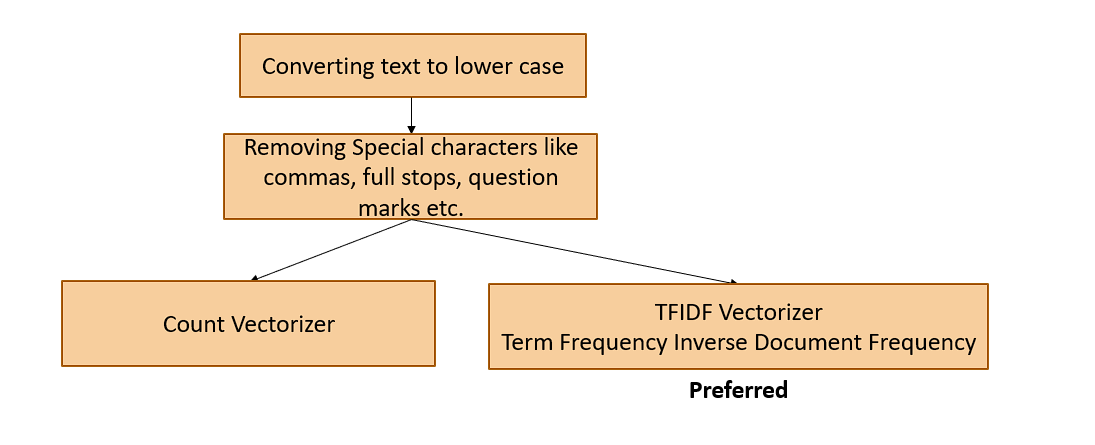

In [4]:
st = 'Hi all, My name is Abhijeet Sharma...!'

In [5]:
st

'Hi all, My name is Abhijeet Sharma...!'

In [6]:
st2 = st.lower()

In [7]:
st2

'hi all, my name is abhijeet sharma...!'

## Remove any special characters

In [8]:
import re
st3 = re.sub("[^a-z ]", "", st2)
st3

'hi all my name is abhijeet sharma'

## Create a function to preprocess the text data

In [9]:
def preprocess_text(st):
    st2 = st.lower()
    st3 = re.sub("[^a-z ]", "", st2)
    return st3

In [10]:
preprocess_text('Hi all, THis is text Classification steps....!')

'hi all this is text classification steps'

## Apply the function on dataframe

In [11]:
df['pre'] = df['Review'].apply(preprocess_text)

In [12]:
df.head()

,Review,Liked,pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


## Appluy tfidf vectorizer on preprocessed data
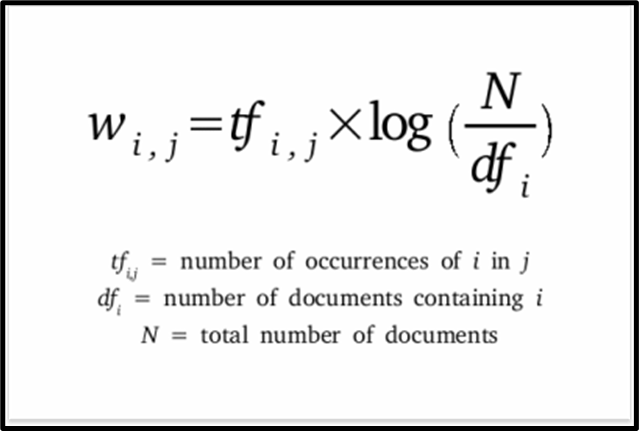

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
x_pre = tf.fit_transform(df['pre']).toarray()
x_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
x_pre.shape

(1000, 2046)

In [15]:
Y = df['Liked']
Y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

## Apply train test split

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, Y, test_size=0.2, random_state=21)

In [17]:
xtrain.shape

(800, 2046)

In [18]:
xtest.shape

(200, 2046)

## Creating neural network
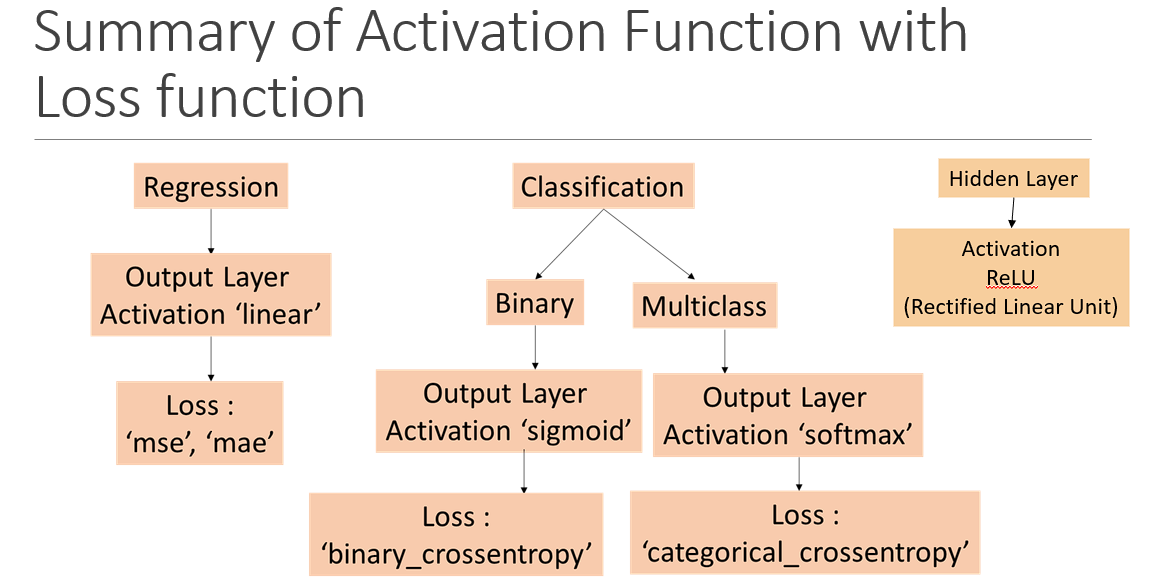

In [19]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

In [20]:
model = Sequential()

# Creating inpute layer
model.add(Input(shape=(xtrain.shape[1],)))
# Craete a Dense layer 1
model.add(Dense(units=128, activation='relu'))
# Create a Dropout layer 1
model.add(Dropout(rate=0.4))
# Create a Dense layer 2
model.add(Dense(units=64, activation='relu'))
# Create a Dropout layer 2
model.add(Dropout(rate=0.3))
# Create a final Output with Sigmoid
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262016    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 270337 (1.03 MB)
Trainable params: 270337 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the model

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
es = EarlyStopping(monitor='val_loss', patience=5)

In [26]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100, callbacks=[es])

Epoch 1/100


20/20 [==============================] - 3s 21ms/step - loss: 0.6922 - accuracy: 0.5031 - val_loss: 0.6878 - val_accuracy: 0.7250
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6784 - accuracy: 0.7266 - val_loss: 0.6783 - val_accuracy: 0.7688
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6446 - accuracy: 0.8453 - val_loss: 0.6501 - val_accuracy: 0.7750
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5544 - accuracy: 0.8844 - val_loss: 0.5777 - val_accuracy: 0.7750
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3699 - accuracy: 0.9484 - val_loss: 0.4720 - val_accuracy: 0.8000
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1995 - accuracy: 0.9656 - val_loss: 0.4346 - val_accuracy: 0.7875
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0966 - accuracy: 0.9828 - val_loss: 0.4302 - val_accuracy: 0.7812
Epoch 8/10

## evaluate the model

In [27]:
model.evaluate(xtrain, ytrain)

25/25 [==============================] - 0s 2ms/step - loss: 0.1052 - accuracy: 0.9563


[0.10520727187395096, 0.956250011920929]

In [28]:
model.evaluate(xtest, ytest)

7/7 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7950


[0.46943503618240356, 0.7950000166893005]

## Predict the probability

In [29]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

7/7 [==============================] - 0s 2ms/step


In [31]:
yprob_tr[0:5]

array([[9.9077940e-01],
       [9.9915791e-01],
       [9.9990511e-01],
       [2.7794723e-04],
       [1.0056668e-03]], dtype=float32)

In [32]:
yprob_ts[0:5]

array([[0.30134615],
       [0.00228133],
       [0.9697815 ],
       [0.9985294 ],
       [0.9991007 ]], dtype=float32)

## Predict the result

In [36]:
ypred_tr = [1 if prob>=0.5 else 0 for prob in yprob_tr]
ypred_ts = [1 if prob>=0.5 else 0 for prob in yprob_ts]

In [38]:
ypred_tr[0:5]

[1, 1, 1, 0, 0]

In [39]:
ytrain[0:5]

108    1
134    1
585    1
42     0
990    0
Name: Liked, dtype: int64

In [40]:
ypred_ts[0:5]

[0, 0, 1, 1, 1]

In [41]:
ytest[0:5]

492    0
383    0
856    1
834    1
603    1
Name: Liked, dtype: int64

## Plot the confusion matrix

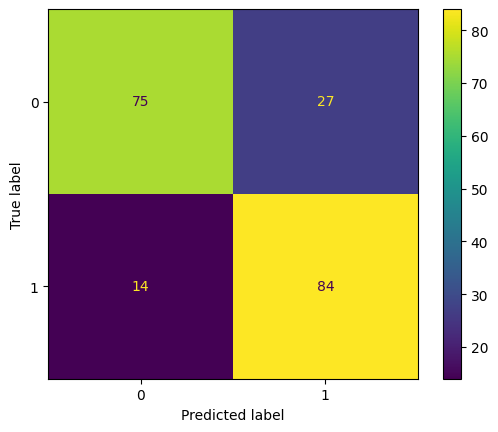

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

## Print the classification report

In [43]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       102
           1       0.76      0.86      0.80        98

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200



## Predict the user defined sentiments

In [44]:
def predict_sentiment(model, tf):
    st = input('Please write an review : ')
    st2 = preprocess_text(st)
    xnew = tf.transform([st2]).toarray()
    prob = model.predict([xnew])
    print(f'Probability that sentiments is positive : {prob}')
    if prob>=0.5:
        print("Given review is a Positive")
    else:
        print('Given review is Negative')

In [45]:
predict_sentiment(model, tf)

1/1 [==============================] - 0s 433ms/step
Probability that sentiments is positive : [[0.9998517]]
Given review is a Positive


In [46]:
predict_sentiment(model, tf)

1/1 [==============================] - 0s 24ms/step
Probability that sentiments is positive : [[0.00057177]]
Given review is Negative


## Save the model for future uses

In [47]:
model.save('SentimentPredictor.keras')

## load the model

In [48]:
from keras.models import load_model
sp = load_model('SentimentPredictor.keras')

In [49]:
sp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262016    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 270337 (1.03 MB)
Trainable params: 270337 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
